In [65]:

import matplotlib.pyplot as plt
import nest

In [66]:

nest.ResetKernel()

neuron = nest.Create("iaf_psc_alpha")

In [67]:
multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

spikerecorder = nest.Create("spike_recorder")

In [68]:
noise_ex = nest.Create("poisson_generator")
noise_in = nest.Create("poisson_generator")
noise_ex.set(rate=80000.0)
noise_in.set(rate=15000.0)

In [69]:
nest.Connect(noise_ex, neuron, syn_spec={"weight": 1.3})
nest.Connect(noise_in, neuron, syn_spec={"weight": -2.7})

nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikerecorder)

In [70]:
nest.Simulate(1000.0)


Aug 13 11:04:34 NodeManager::prepare_nodes [Info]: 
    Preparing 5 nodes for simulation.

Aug 13 11:04:34 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 5
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Aug 13 11:04:34 SimulationManager::run [Info]: 
    Simulation finished.


In [71]:
dmm = multimeter.get()
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

events = spikerecorder.get("events")
senders = events["senders"]
spike_ts = events["times"]

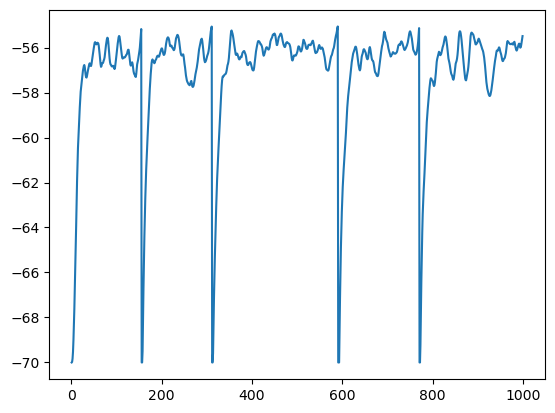

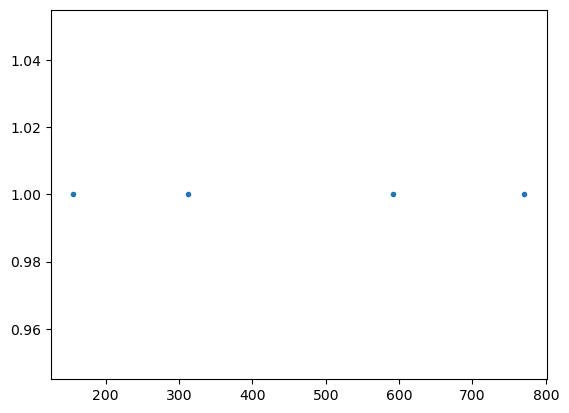

In [72]:
plt.figure(1)
plt.plot(ts, Vms)

plt.figure(2)
plt.plot(spike_ts, senders, ".")
plt.show()